# This notebook is to perform "split each organism" test aka test 1

In [1]:
import sys
sys.path.append("..")
import numpy as np
from src.preprocessing.preproc import adherence_data, toxicity_data, amr_data
from src.models.ML_functions import *
from src.ensemble.ensemble_functions import *
from harness.th_model_instances.hamed_models.random_forest_classification import random_forest_classification
from harness.th_model_instances.hamed_models.navie_bayes import gaussian_naive_bayes_classification
from harness.th_model_instances.hamed_models.rocklin_models import logistic_classifier
from harness.th_model_instances.perovskite_models.xgboost import gradient_boosted_tree
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
th_path ='../data_files/ML_output/Test1'

# Adherence

In [3]:
adh_a549, feature_cols = adherence_data.process_a549_files(['../data_files/Adherence/old_ivv_A549', '../data_files/Adherence/new_ivv_A549'])

In [4]:
adh_a549_subset = adh_a549[adh_a549['Common Name'] != 'NIST0068']

In [46]:
run_ml_test1(adh_a549_subset, 'adherence1', feature_cols_to_use=feature_cols, 
       models_to_test = [logistic_classifier, gaussian_naive_bayes_classification, random_forest_classification, gradient_boosted_tree],
       output_dir = th_path, repeat = 10, feature_cols_to_normalize=feature_cols, sparse_cols_to_use=None, percents = [0.2,0.3,0.4,0.5,0.6,0.7,0.8])


----------------------------------------------------------------------------------------------------
Starting run of model logistic_classifier at time 16:02:23
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.00 seconds
Testing time was: 0.01 seconds
Run finished at 16:02:23. Total run time = 0.59 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gaussian_naive_bayes_classification at time 16:02:23
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.00 seconds
Testing time was: 0.01 seconds
Run finished at 16:02:24. Total run time = 0.10 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


-------------------------------------------------------------

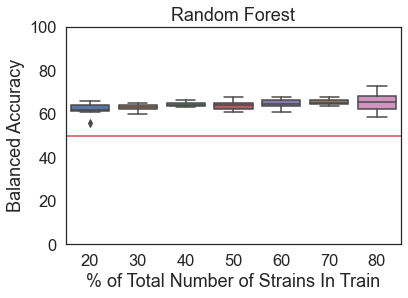

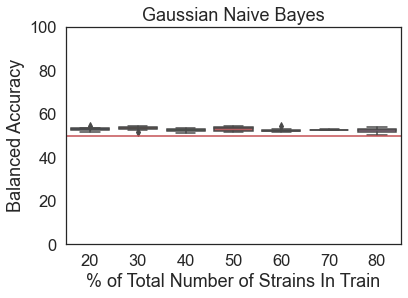

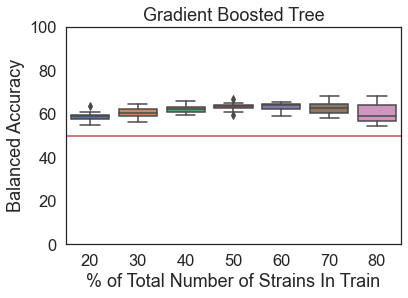

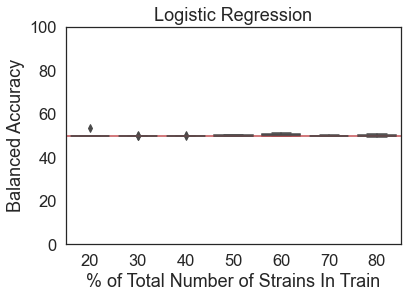

In [3]:
plot_leaderboard('adherence1', th_path)

In [4]:
get_max_accuracy('adherence1', th_path)

Description      Model Name                  
adherence1__0.8  random_forest_classification    65.35
Name: Balanced Accuracy, dtype: float64
Description      Model Name                  
adherence1__0.8  random_forest_classification    4.229854
Name: Balanced Accuracy, dtype: float64


# Toxicity

In [5]:
old_ivv = pd.read_csv('../data_files/Toxicity/old_toxicity_ivv.csv')
new_ivv = toxicity_data.load('../data_files/Toxicity/processed_PI_12_22_2020.csv', '../data_files/Toxicity/processed_hoechst_12_22_2020.csv',
                         add_time = True)
joined_ivv = pd.concat([old_ivv, new_ivv]).reset_index(drop = True)
joined_ivv['index_col'] = range(len(joined_ivv))
feature_cols = ['Time', 'DAPI', 'Hoechst']

In [55]:
run_ml_test1(joined_ivv, 'tox1', feature_cols_to_use=feature_cols, 
             models_to_test = [logistic_classifier, gaussian_naive_bayes_classification, random_forest_classification, gradient_boosted_tree],
             output_dir = th_path, repeat = 10,
             feature_cols_to_normalize=feature_cols, sparse_cols_to_use=None, percents = [0.2,0.3,0.4,0.5,0.6,0.7,0.8])


----------------------------------------------------------------------------------------------------
Starting run of model logistic_classifier at time 16:16:14
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.00 seconds
Testing time was: 0.01 seconds
Run finished at 16:16:14. Total run time = 0.36 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gaussian_naive_bayes_classification at time 16:16:14
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.00 seconds
Testing time was: 0.01 seconds
Run finished at 16:16:15. Total run time = 0.35 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


-------------------------------------------------------------

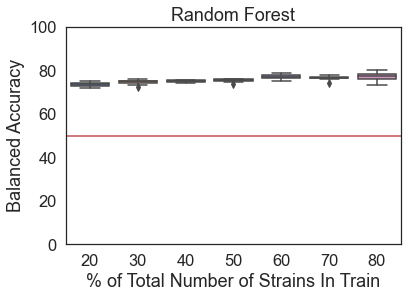

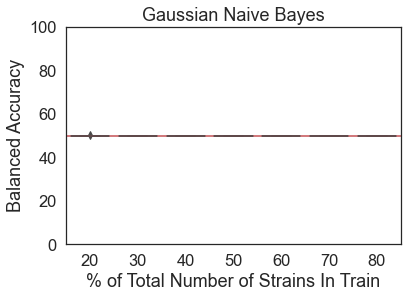

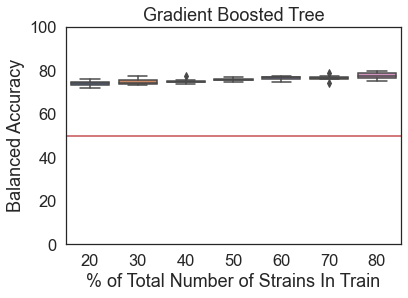

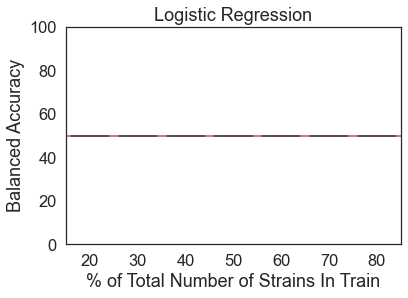

In [14]:
plot_leaderboard('tox1', th_path)

In [6]:
get_max_accuracy('tox1', th_path)

Description  Model Name           
tox1__0.8    gradient_boosted_tree    77.46
Name: Balanced Accuracy, dtype: float64
Description  Model Name           
tox1__0.8    gradient_boosted_tree    1.409649
Name: Balanced Accuracy, dtype: float64


# Reporter

In [17]:
controls = pd.read_csv('../data_files/Immune activation/controls.csv')
all_reporter_df = pd.read_csv('../data_files/Immune activation/other_strains.csv')
scaled_features = [col for col in all_reporter_df.columns if 'scaled' in col]
total_reporter = pd.concat([controls, all_reporter_df]).reset_index(drop = True)

In [70]:
run_ml_test1(total_reporter, 'reporter1', feature_cols_to_use=scaled_features, 
             models_to_test = [logistic_classifier, gaussian_naive_bayes_classification, random_forest_classification, gradient_boosted_tree],
             output_dir = th_path, repeat = 10, feature_cols_to_normalize=scaled_features, 
             sparse_cols_to_use=None, percents = [0.2,0.3,0.4,0.5,0.6,0.7,0.8])


----------------------------------------------------------------------------------------------------
Starting run of model logistic_classifier at time 16:50:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.02 seconds
Testing time was: 0.01 seconds
Run finished at 16:50:34. Total run time = 1.11 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gaussian_naive_bayes_classification at time 16:50:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.00 seconds
Testing time was: 0.01 seconds
Run finished at 16:50:36. Total run time = 0.96 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


-------------------------------------------------------------

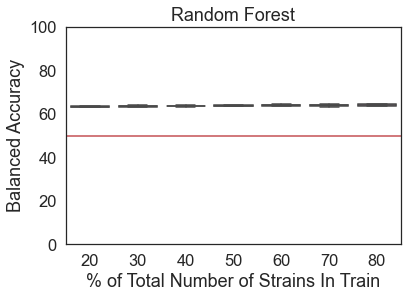

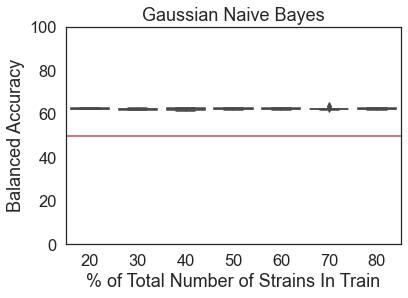

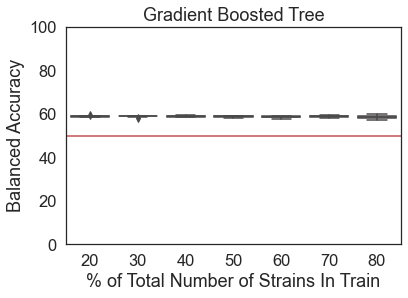

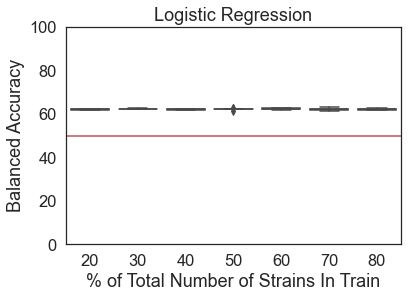

In [7]:
plot_leaderboard('reporter1', th_path)

In [6]:
get_max_accuracy('reporter1', th_path)

Description     Model Name                  
reporter1__0.8  random_forest_classification    63.98
Name: Balanced Accuracy, dtype: float64
Description     Model Name                  
reporter1__0.8  random_forest_classification    0.431535
Name: Balanced Accuracy, dtype: float64


# AMR (or AR)

In [24]:
amr_df_oct2021_1 = pd.read_csv('../data_files/AMR/experiment 10.06.2021.csv')
amr_df_oct2021_2 = pd.read_csv('../data_files/AMR/experiment 10.07.2021.csv')
joined_amr_df = pd.concat([amr_df_oct2021_1, amr_df_oct2021_2]).reset_index(drop = True)
joined_amr_df = joined_amr_df[joined_amr_df.antibiotic.isin(['Rifampin', 'Ciprofloxacin', 'Imipenem',
                                                                 'Doxycycline','Azithromycin', 'Meropenem'])]
joined_amr_df['index_col'] = range(len(joined_amr_df))

In [67]:
run_ml_test1(joined_amr_df, 'amr_new_6_antibiotics1', feature_cols_to_use=['antibiotic', 'DD', 'DD^2', 'DD^2_std'], 
       models_to_test = [logistic_classifier, gaussian_naive_bayes_classification, random_forest_classification, gradient_boosted_tree],
       output_dir = th_path, repeat = 10, feature_cols_to_normalize=['DD', 'DD^2', 'DD^2_std'], 
       sparse_cols_to_use=['antibiotic'], percents = [0.2,0.3,0.4,0.5,0.6,0.7,0.8])


----------------------------------------------------------------------------------------------------
Starting run of model logistic_classifier at time 16:44:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.00 seconds
Testing time was: 0.01 seconds
Run finished at 16:44:13. Total run time = 0.68 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gaussian_naive_bayes_classification at time 16:44:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.00 seconds
Testing time was: 0.01 seconds
Run finished at 16:44:13. Total run time = 0.47 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


-------------------------------------------------------------

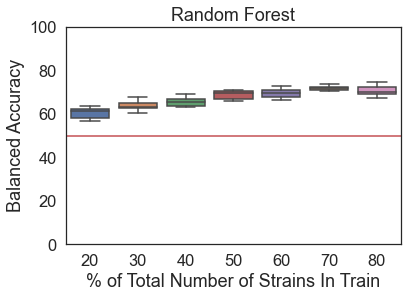

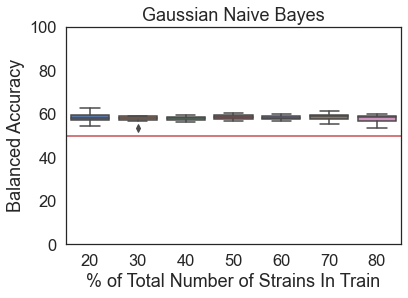

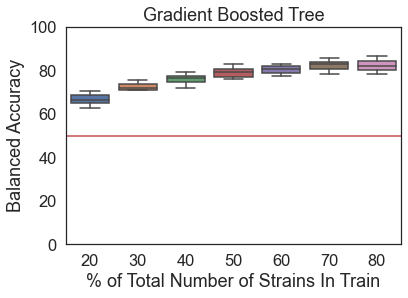

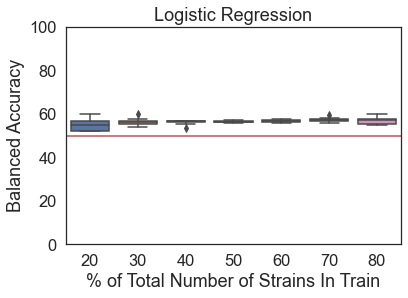

In [44]:
plot_leaderboard('amr1', th_path)

In [7]:
get_max_accuracy('amr1', th_path)

Description  Model Name           
amr1__0.8    gradient_boosted_tree    82.24
Name: Balanced Accuracy, dtype: float64
Description  Model Name           
amr1__0.8    gradient_boosted_tree    2.849249
Name: Balanced Accuracy, dtype: float64


# Stage 2 ensemble (aggregate across observations to predict each bacterial strain as pathogenic or not)

In [21]:
adh_acc = stage2_balanced_accuracy('adherence1', 'random', th_path)
tox_acc = stage2_balanced_accuracy('tox1', 'gradient', th_path)
reporter_acc = stage2_balanced_accuracy('reporter1', 'random', th_path)
amr_acc = stage2_balanced_accuracy('amr1', 'gradient', th_path)

adherence1 0.2 10
adherence1 0.3 10
adherence1 0.4 10
adherence1 0.5 10
adherence1 0.6 10
adherence1 0.7 10
adherence1 0.8 10
tox1 0.2 10
tox1 0.3 14
tox1 0.4 10
tox1 0.5 10
tox1 0.6 10
tox1 0.7 10
tox1 0.8 10
reporter1 0.2 10
reporter1 0.3 10
reporter1 0.4 10
reporter1 0.5 10
reporter1 0.6 10
reporter1 0.7 10
reporter1 0.8 10
amr1 0.2 10
amr1 0.3 10
amr1 0.4 10
amr1 0.5 10
amr1 0.6 10
amr1 0.7 10
amr1 0.8 10


In [68]:
adh_acc = stage2_balanced_accuracy('adherence1', 'random', th_path)
tox_acc = stage2_balanced_accuracy('tox1', 'gradient', th_path)
reporter_acc = stage2_balanced_accuracy('reporter1', 'random', th_path)
amr_acc = stage2_balanced_accuracy('amr1', 'gradient', th_path)

adherence1 0.2 10
adherence1 0.3 10
adherence1 0.4 10
adherence1 0.5 10
adherence1 0.6 10
adherence1 0.7 10
adherence1 0.8 10
tox1 0.2 10
tox1 0.3 14
tox1 0.4 10
tox1 0.5 10
tox1 0.6 10
tox1 0.7 10
tox1 0.8 10
reporter1 0.2 10
reporter1 0.3 10
reporter1 0.4 10
reporter1 0.5 10
reporter1 0.6 10
reporter1 0.7 10
reporter1 0.8 10
amr1 0.2 10
amr1 0.3 10
amr1 0.4 10
amr1 0.5 10
amr1 0.6 10
amr1 0.7 10
amr1 0.8 10


Figure has been saved.


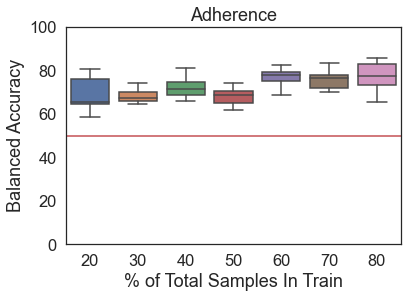

Figure has been saved.


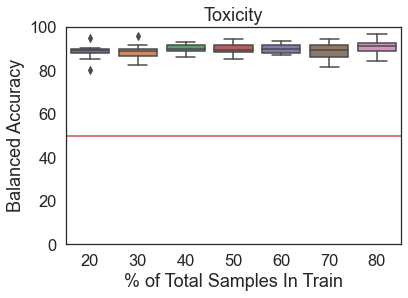

Figure has been saved.


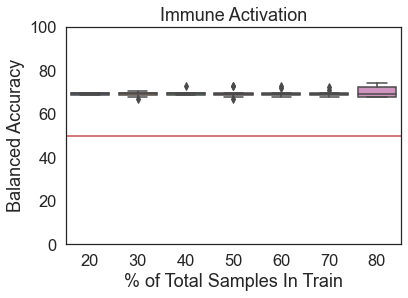

Figure has been saved.


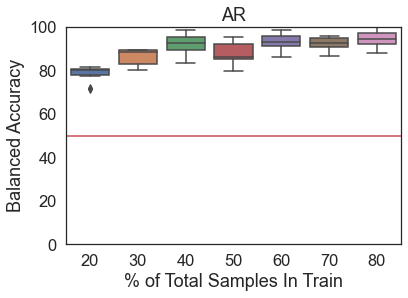

In [95]:
assay_names = ['Adherence', 'Toxicity', 'Immune Activation', 'AR']
for i, acc in enumerate([adh_acc, tox_acc, reporter_acc, amr_acc]):
    plot_stage2_aggregated_accuracy(acc, assay_names[i], th_path)

In [70]:
print(max(adh_acc.groupby(['% of Total Samples In Train'])['Balanced Accuracy'].mean()))
print(max(tox_acc.groupby(['% of Total Samples In Train'])['Balanced Accuracy'].mean()))
print(max(reporter_acc.groupby(['% of Total Samples In Train'])['Balanced Accuracy'].mean()))
print(max(amr_acc.groupby(['% of Total Samples In Train'])['Balanced Accuracy'].mean()))

77.40126463384192
91.00940544207367
69.99527134314424
94.52657044166551


# Stage 3 ensemble

In [45]:
best_adh_data = get_test_data('adherence1', 0.8, 'random', th_path)
best_tox_data = get_test_data('tox1', 0.8, 'gradient', th_path)
best_reporter_data = get_test_data('reporter1', 0.8, 'random', th_path)
best_amr_data = get_test_data('amr1', 0.8, 'gradient', th_path)

In [110]:
stage3_df = get_different_stage3_combo1(best_adh_data, best_tox_data, best_reporter_data, best_amr_data, 0.02)
np.round(stage3_df.groupby(['Assays']).mean())

,Accuracy,Precision,Recall,F1
Assays,,,,
adh_ar,97.0,96.0,100.0,98.0
adh_tox,91.0,91.0,96.0,94.0
adh_tox_ar,98.0,98.0,98.0,98.0
all 4,99.0,99.0,99.0,99.0
tox_ar,98.0,98.0,100.0,99.0


In [54]:
stage3_mean_by_strain = stage3_by_strain([best_adh_data,best_tox_data,best_reporter_data,best_amr_data], 0.02)

Accuracy 1.0


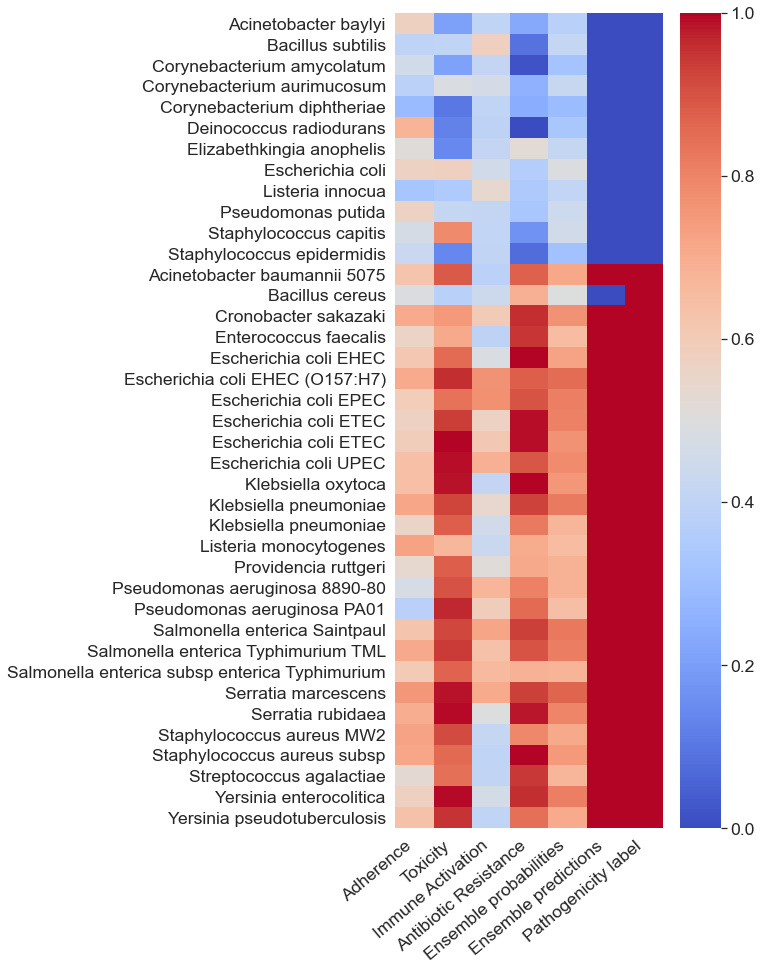

In [18]:
joined_avg = plot_strain_level_heatmap([best_adh_data,best_tox_data,best_reporter_data,best_amr_data],['Adherence','Toxicity','Immune Activation','Antibiotic Resistance'], 
                         stage3_mean_by_strain[['Foe_prob_predictions','Foe_pred']])

In [20]:
get_pos_overlap(joined_avg)

% foe predicted as foe in 4 assays 0.444
% foe predicted as foe in 3 assays 0.963
% foe predicted as foe in 2 assays 0.963
% foe predicted as foe in 1 assays 1.0
